In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf


In [183]:
data = pd.read_csv('Pokemon.csv')
raw_data = data.copy()
raw_data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


# Data Cleaning


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [185]:
data.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [186]:
data['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [187]:
data['Type 2'] = data['Type 2'].fillna(0)
data.isna().sum()


#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [188]:
data.drop(columns=['#', 'Name'], inplace=True)

In [189]:
data['Legendary'] = data['Legendary'].astype(np.int64)

In [190]:
data

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Fire,0,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6,1
796,Rock,Fairy,700,50,160,110,160,110,110,6,1
797,Psychic,Ghost,600,80,110,60,150,130,70,6,1
798,Psychic,Dark,680,80,160,60,170,130,80,6,1


# EDA

In [191]:
data['Type 2'].value_counts()

Type 2
0           386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: count, dtype: int64

In [192]:
numeric_colums = data.drop(columns=['Type 1', 'Type 2'], axis=1).columns
numeric_colums

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation', 'Legendary'],
      dtype='object')

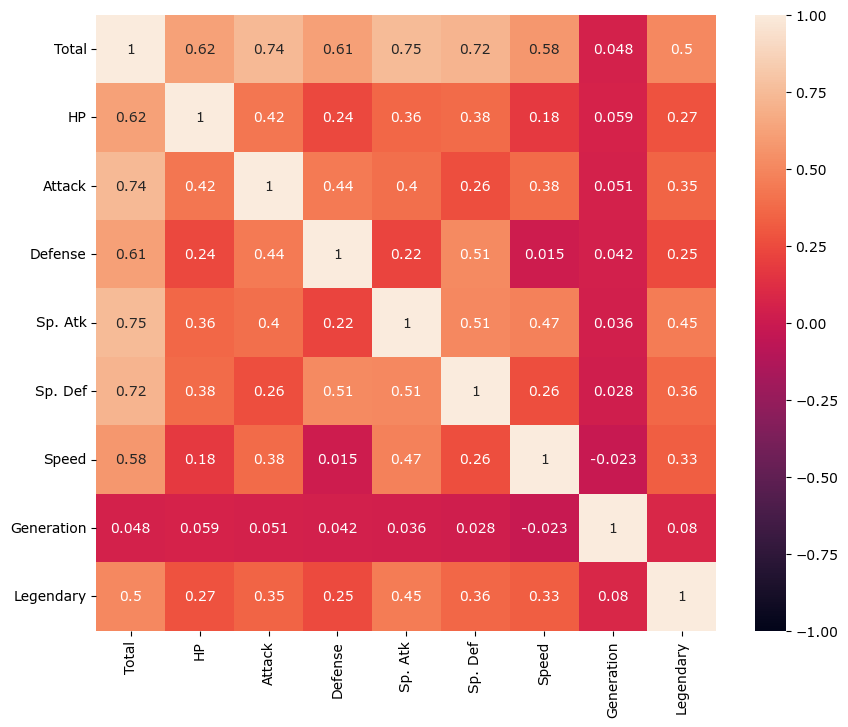

In [193]:
corr_matrix = data[numeric_colums].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, vmax=1.0, vmin=-1.0)
plt.show()

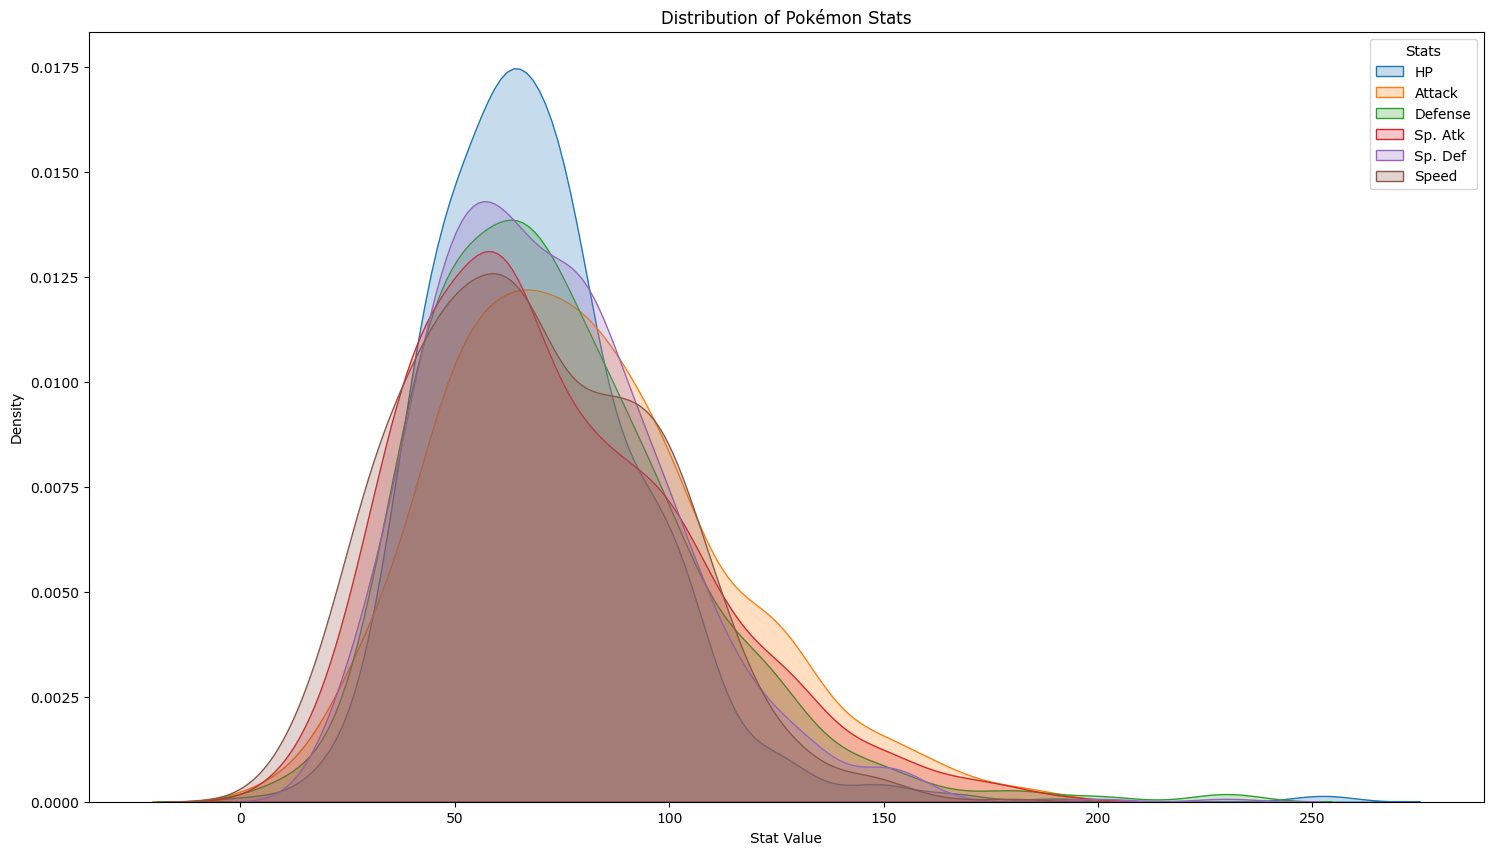

In [194]:
plt.figure(figsize=(18,10))
for col in ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
    sns.kdeplot(data[col], fill = True,label=col)

plt.legend(title='Stats')
plt.title('Distribution of Pokémon Stats')
plt.xlabel('Stat Value')
plt.ylabel('Density')
plt.show()


In [195]:
data.dtypes

Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary      int64
dtype: object

# Pre-Processing

### Encoding

In [196]:
def onehot_encoding_shared_types(df, col1, col2, prefix):
    df = df.copy()
    combined = pd.concat([df[col1], df[col2]]).dropna().unique()
    
    for t in combined:
        df[f'{prefix}_{t}'] = ((df[col1] == t) | (df[col2] == t)).astype(int)
        
    df.drop([col1, col2], axis=1, inplace=True)  # <- Fix: drop needs inplace or reassignment
    return df


In [197]:
encoded_df = onehot_encoding_shared_types(data, 'Type 1', 'Type 2', 'Type')

In [198]:
pd.set_option('display.max_columns', None)
encoded_df.head()


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type_Grass,Type_Fire,Type_Water,Type_Bug,Type_Normal,Type_Poison,Type_Electric,Type_Ground,Type_Fairy,Type_Fighting,Type_Psychic,Type_Rock,Type_Ghost,Type_Ice,Type_Dragon,Type_Dark,Type_Steel,Type_Flying,Type_0
0,318,45,49,49,65,65,45,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,405,60,62,63,80,80,60,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,525,80,82,83,100,100,80,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,625,80,100,123,122,120,80,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,309,39,52,43,60,50,65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [199]:
encoded_df.drop(columns='Type_0', inplace=True)
encoded_df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type_Grass,Type_Fire,Type_Water,Type_Bug,Type_Normal,Type_Poison,Type_Electric,Type_Ground,Type_Fairy,Type_Fighting,Type_Psychic,Type_Rock,Type_Ghost,Type_Ice,Type_Dragon,Type_Dark,Type_Steel,Type_Flying
0,318,45,49,49,65,65,45,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,405,60,62,63,80,80,60,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,525,80,82,83,100,100,80,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,625,80,100,123,122,120,80,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,309,39,52,43,60,50,65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
796,700,50,160,110,160,110,110,6,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
797,600,80,110,60,150,130,70,6,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
798,680,80,160,60,170,130,80,6,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


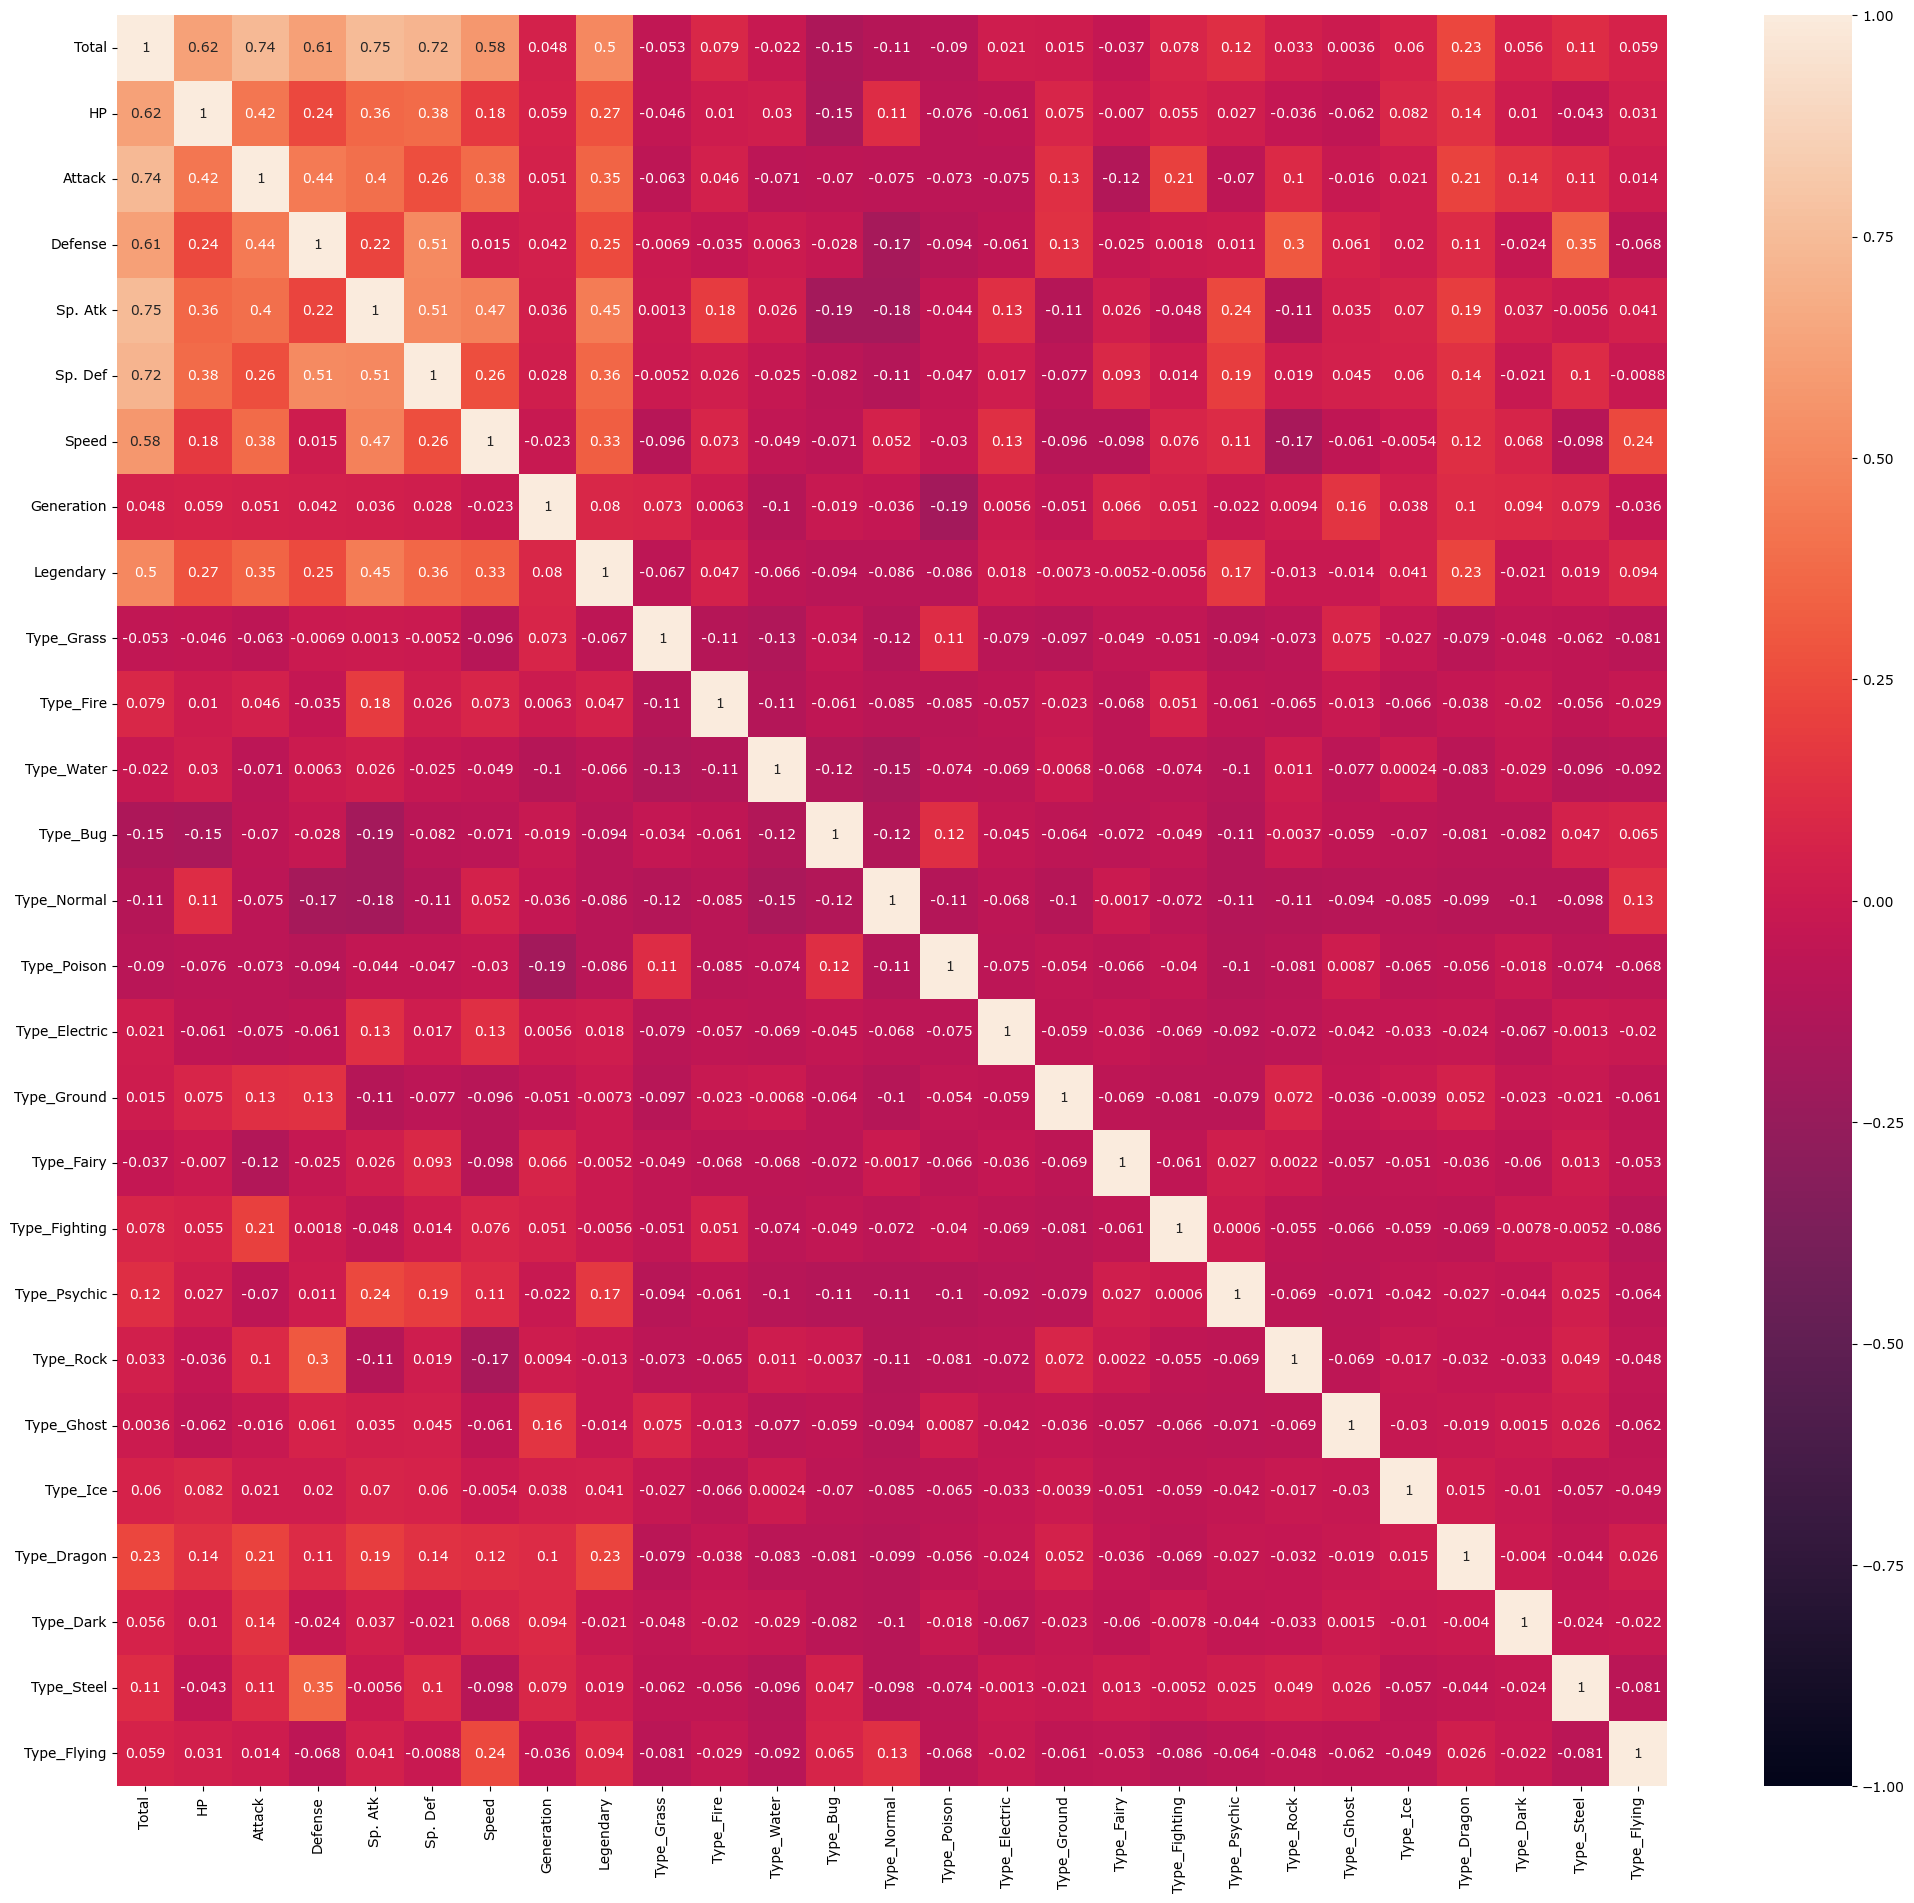

In [200]:
new_corr_matrix = encoded_df.corr()
plt.figure(figsize=(25,23))
sns.heatmap(new_corr_matrix, annot=True, vmax=1.0, vmin=-1.0)
plt.show()

# Splitting and Scalling

In [201]:
y = encoded_df['Legendary']
X = encoded_df.drop('Legendary', axis = 1)

In [202]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [204]:
len(X_train)

560

# Training

In [205]:
X.shape

(800, 26)

In [206]:
input = tf.keras.Input(shape=(26,))
x = tf.keras.layers.Dense(64, activation='relu')(input)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=input, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks = [tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7248 - auc: 0.7196 - loss: 0.5740 - val_accuracy: 0.9018 - val_auc: 0.4932 - val_loss: 0.3908 - learning_rate: 0.0010
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9177 - auc: 0.7310 - loss: 0.3009 - val_accuracy: 0.9018 - val_auc: 0.7025 - val_loss: 0.3019 - learning_rate: 0.0010
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8935 - auc: 0.9152 - loss: 0.2459 - val_accuracy: 0.9018 - val_auc: 0.8488 - val_loss: 0.2539 - learning_rate: 0.0010
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9292 - auc: 0.9411 - loss: 0.1899 - val_accuracy: 0.9107 - val_auc: 0.8866 - val_loss: 0.2239 - learning_rate: 0.0010
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9402 - auc: 0.9712 - loss: 0.1547 - val_accuracy: 0.9107 - val_auc: 0.9095 - val_loss: 0.2058 - learning_rate: 0.0010
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9610 - auc: 0.9733 

In [207]:
fig_loss = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'value': 'Loss', 'index': 'Epochs', 'variable': 'Dataset'},
    title='Epochs vs Loss'
)
fig_loss.show()

In [208]:
np.argmin(history.history['val_loss'])

np.int64(13)

In [209]:
fig_auc = px.line(history.history,y=['auc','val_auc'], labels={'x':'Epochs','y':'Loss'}, title=' Epochs vs AUC')
fig_auc.show()

In [210]:
model.evaluate(X_test,y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9810 - auc: 0.8766 - loss: 0.0713     


[0.0950947254896164, 0.9666666388511658, 0.9783703088760376]

# Post Training Analysis


In [230]:
predictions = np.hstack((model.predict(X_test) >= 0.5).astype(np.int64)) != y_test
predictions

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


696    False
667    False
63     False
533    False
66     False
       ...  
220    False
450    False
380    False
132    False
375    False
Name: Legendary, Length: 240, dtype: bool

In [231]:
predictions.sum()

np.int64(8)

In [227]:
1- 8/240

0.9666666666666667

In [234]:
mislabled_indecies = y_test[predictions].index

In [235]:
raw_data.loc[mislabled_indecies,:]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
264,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
527,475,GalladeMega Gallade,Psychic,Fighting,618,68,165,95,65,115,110,4,False
196,181,AmpharosMega Ampharos,Electric,Dragon,610,90,95,105,165,110,45,2,False
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
165,151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False


# Data Visualization and Results


In [236]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_reduced = pd.DataFrame(pca.fit_transform(encoded_df), columns=['PC1','PC2'])

In [237]:
data_reduced

,PC1,PC2
0,-125.860819,-5.210446
1,-32.131797,-5.769757
2,97.224816,-5.394546
3,206.064980,18.625641
4,-135.910500,-21.594125
...,...,...
795,179.903980,67.082206
796,290.418998,-20.942441
797,181.100268,-27.663819
798,269.323050,-37.484838


In [254]:
legendary_indecies = encoded_df.query('Legendary == 1').index

mislabled_legendary_indecies = np.intersect1d(mislabled_indecies, legendary_indecies)

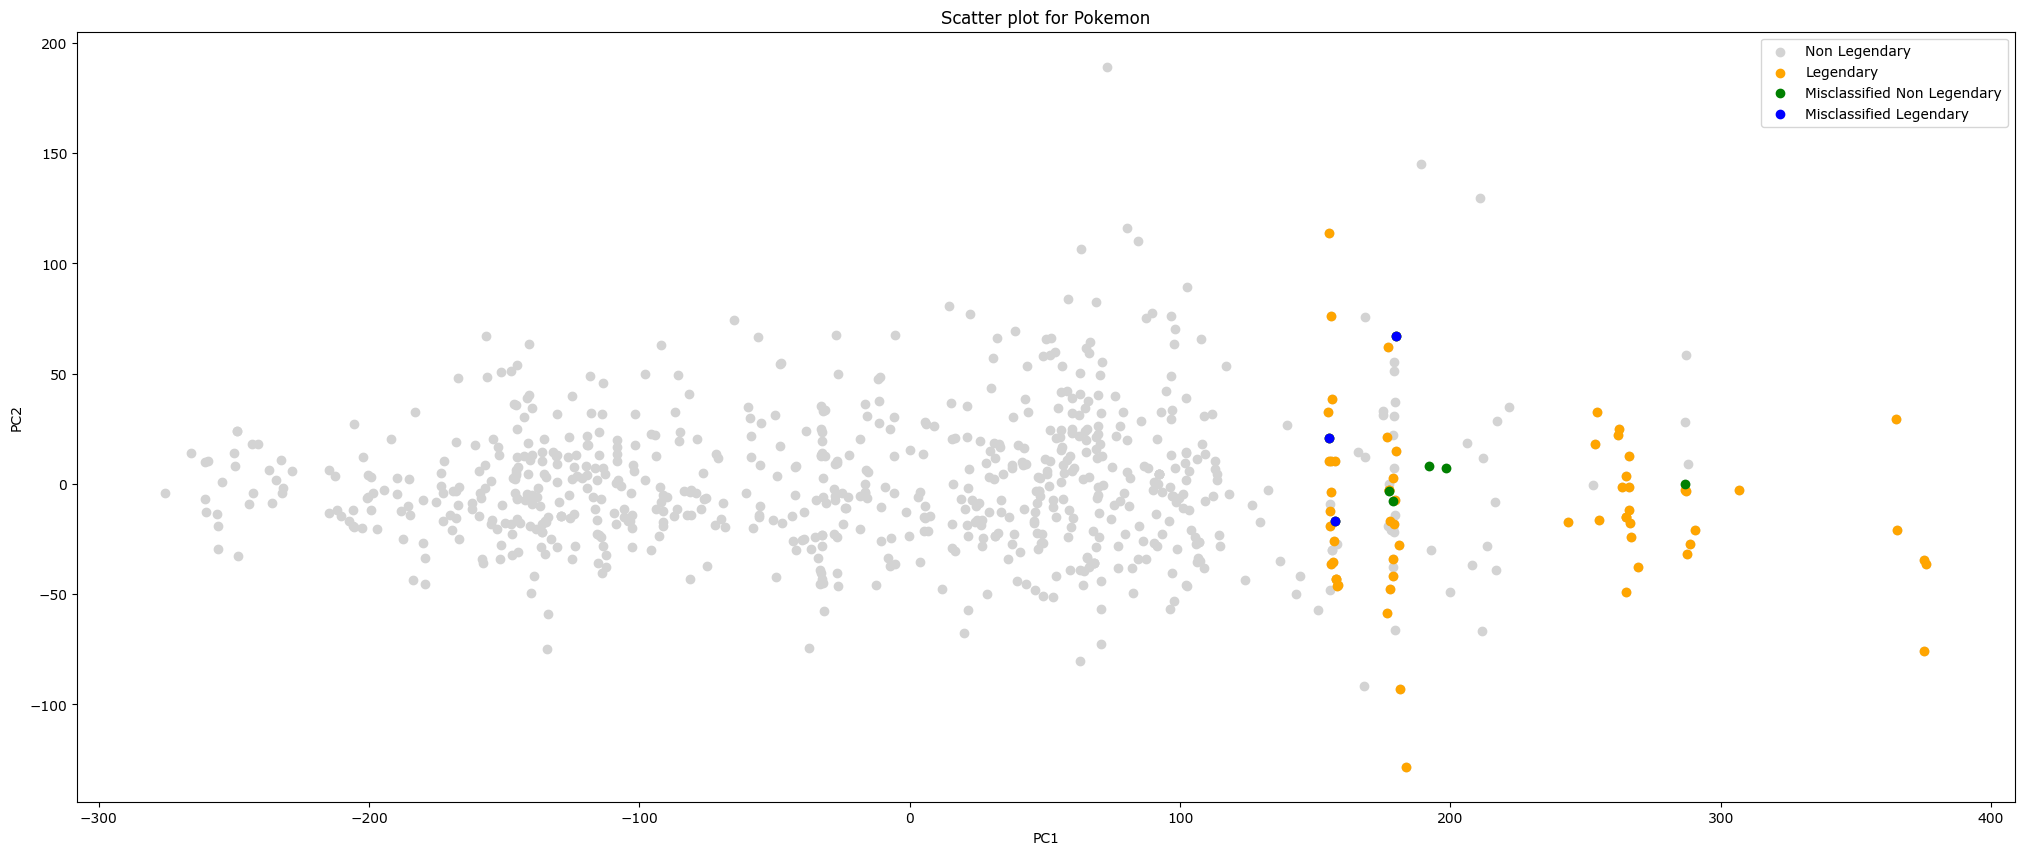

In [258]:
plt.figure(figsize=(25,10))
plt.scatter(data_reduced['PC1'], data_reduced['PC2'], c='lightgrey')

plt.scatter(data_reduced.loc[legendary_indecies, 'PC1'], data_reduced.loc[legendary_indecies, 'PC2'], c='orange')
plt.scatter(data_reduced.loc[mislabled_indecies, 'PC1'], data_reduced.loc[mislabled_indecies, 'PC2'], c='green')
plt.scatter(data_reduced.loc[mislabled_legendary_indecies, 'PC1'], data_reduced.loc[mislabled_legendary_indecies, 'PC2'], c='blue')


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot for Pokemon')
plt.legend(['Non Legendary','Legendary', 'Misclassified Non Legendary', 'Misclassified Legendary'])
plt.show()

In [272]:
pure_mislabels = set(mislabled_indecies) - set(mislabled_legendary_indecies)
raw_data.loc[list(pure_mislabels), 'Name']


196      AmpharosMega Ampharos
165                        Mew
776                     Goodra
527        GalladeMega Gallade
409    SalamenceMega Salamence
Name: Name, dtype: object

In [278]:
def plot_pokemon_stats(df, name):
    
    pokemon_row = df[df['Name'].str.lower() == name.lower()]
    
    if pokemon_row.empty:
        print(f"Pokémon named '{name}' not found.")
        return

    pokemon = pokemon_row.iloc[0]

    stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
    values = pokemon[stats].values

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.bar(stats, values, color='mediumslateblue')
    plt.title(f"{pokemon['Name']} Stats")
    plt.ylabel('Stat Value')
    plt.ylim(0, max(values) + 20)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

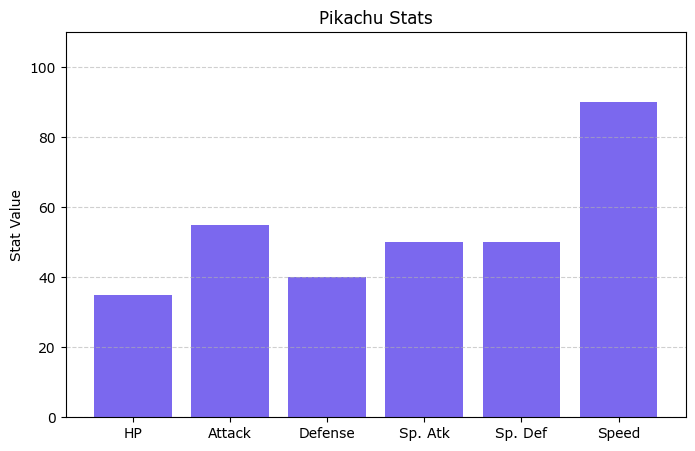

In [280]:
plot_pokemon_stats(raw_data, 'Pikachu')

In [281]:
def plot_pokemon_radar(dataframe, name):
    pokemon_row = dataframe[dataframe['Name'].str.lower() == name.lower()]
    
    if pokemon_row.empty:
        print(f"Pokémon named '{name}' not found.")
        return
    pokemon = pokemon_row.iloc[0]

    labels = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
    stats = pokemon[labels].values

    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    stats = np.concatenate((stats, [stats[0]]))  # close the loop
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, stats, color='deepskyblue', linewidth=2, linestyle='solid')
    ax.fill(angles, stats, color='deepskyblue', alpha=0.4)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title(f"{pokemon['Name']} Stats Radar Chart", size=16, pad=20)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    ax.set_ylim(0, max(stats) + 20)

    plt.show()


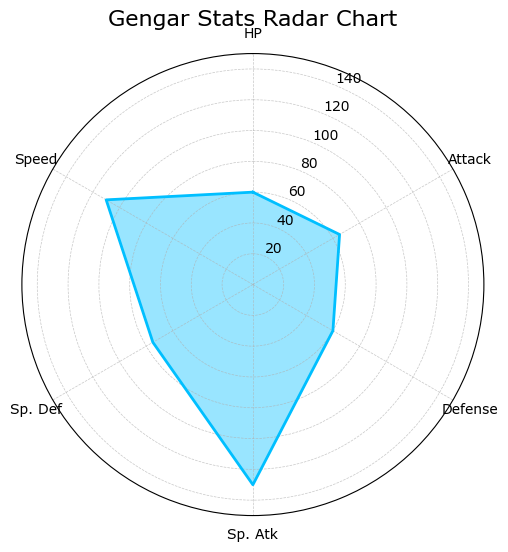

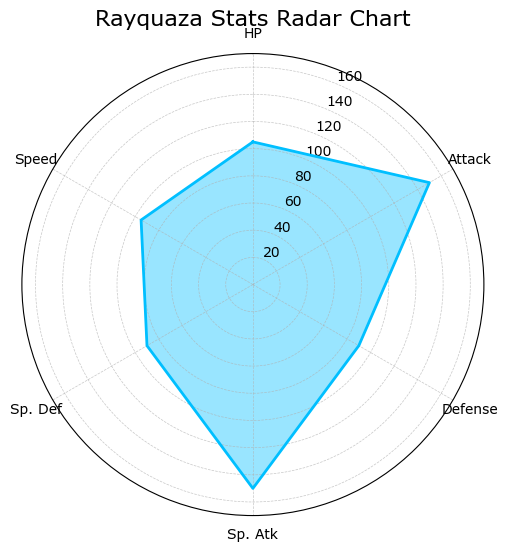

In [282]:
plot_pokemon_radar(raw_data, "Gengar")
plot_pokemon_radar(raw_data, "Rayquaza")
